# Contents

- Clustering
  - Kmeans
  - DBSCSAN
  - Gaussian Mixture Models
- Anomaly Detection ( also called Outlier Detection)
- Density Estimation

# 1. Clustering

**Clustering**: Task to identify similar instances and assigning them to clusters or groups or similar instances.
  - its a unsupervised learning, clustering is used to discover hidden patterns and structures within data, 
  - It is a process of dividing a dataset into subsets or clusters, where data points within a cluster are more similar to each other than to data points in other clusters
  - don't confuse it with classification, it creates group


**Key concepts in clustering**:

 - **Cluster**: A group of data points that share similar characteristics.
 - **Clustering algorithm**: A method used to identify clusters in a dataset.
 - **Similarity metric**: A measure used to quantify the similarity or dissimilarity between data points.

**Common clustering algorithms**:

 - **K-means clustering**: A popular algorithm that divides data into k clusters by minimizing the sum of squared distances between each data point and its assigned cluster center.   
 - **Hierarchical clustering**: A method that creates a hierarchy of clusters, starting with each data point as a separate cluster and merging them based on their similarity.
 - **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: An algorithm that identifies clusters based on density, grouping together data points that are closely packed together.
 - **Gaussian Mixture Models (GMM)**: A probabilistic model that assumes the data is generated from a mixture of Gaussian distributions.
 
 
**Applications of clustering**:

- **Customer segmentation**: Grouping customers based on their demographics, behaviors, or preferences.
- **Image segmentation**: Dividing images into regions based on similar pixel values.
- **Bioinformatics**: Identifying groups of genes or proteins with similar functions.
- **Social network analysis**: Detecting communities of people with similar interests or connections.
- **Anomaly detection**: Identifying outliers or unusual data points.
- **Dimesionality Reduction**: once data cluster, measure each instance affinity with each cluster
   - affinity a measure of how well an instance fits into a cluster. 
   -  By representing each cluster with a single representative point (e.g., the cluster centroid), we can reduce the dimensionality of the data while preserving its essential structure

- **Feature Engineering**: cluster affinities can often be useful as extra features.


**Choosing the right clustering algorithm**:

- The best clustering algorithm depends on the characteristics of the data and the specific goals of the analysis. 
- Factors to consider include:

   - **Number of clusters**: Known or unknown.
   - **Shape of clusters**: Spherical, elongated, or irregular.
   - **Noise in the data**: Presence or absence of outliers.
   - **Computational efficiency**: Required for large datasets

## 1.1 k-means

- Purposed by Stuart Lyold at **Bell Labs** in 1957 as a technique for pulse-code modulation
- Forgy had publisehed virtually in 1965

In [1]:
# lets train k-means cluster 

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 300, centers = 5, random_state = 3)

k=5
kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10) 
y_pred = kmeans.fit_predict(X)


In [2]:
y_pred

array([3, 0, 0, 0, 2, 2, 1, 4, 0, 1, 2, 3, 0, 3, 2, 0, 3, 4, 2, 4, 1, 3,
       0, 1, 0, 2, 4, 3, 2, 4, 4, 0, 3, 4, 3, 0, 3, 4, 2, 4, 3, 3, 1, 3,
       0, 4, 2, 1, 3, 4, 0, 2, 2, 2, 3, 4, 1, 2, 2, 1, 0, 3, 1, 1, 1, 4,
       4, 1, 4, 1, 1, 1, 0, 2, 0, 2, 1, 4, 3, 3, 0, 0, 0, 2, 3, 0, 2, 1,
       4, 0, 4, 3, 3, 2, 2, 1, 2, 4, 1, 1, 3, 4, 0, 0, 0, 4, 1, 4, 2, 1,
       0, 2, 0, 4, 3, 3, 0, 4, 3, 0, 2, 2, 2, 0, 2, 0, 2, 2, 4, 1, 3, 3,
       1, 2, 1, 4, 2, 1, 1, 1, 3, 0, 1, 2, 2, 1, 0, 3, 0, 3, 2, 0, 0, 4,
       4, 1, 2, 3, 1, 4, 3, 1, 1, 0, 3, 3, 1, 4, 3, 4, 3, 0, 4, 0, 4, 3,
       3, 4, 1, 1, 3, 4, 0, 2, 1, 4, 0, 4, 1, 4, 0, 2, 1, 3, 1, 2, 0, 3,
       4, 1, 0, 1, 2, 4, 3, 3, 3, 2, 2, 4, 0, 1, 4, 2, 4, 0, 0, 1, 1, 0,
       1, 1, 4, 2, 3, 3, 2, 3, 2, 4, 2, 0, 3, 3, 1, 2, 0, 1, 0, 4, 4, 3,
       3, 4, 0, 3, 3, 1, 2, 4, 0, 2, 2, 0, 1, 0, 3, 4, 2, 2, 2, 0, 4, 3,
       4, 1, 1, 4, 2, 3, 4, 0, 1, 2, 2, 1, 1, 4, 4, 4, 0, 4, 2, 1, 3, 4,
       4, 0, 0, 1, 2, 3, 1, 0, 3, 3, 2, 2, 1, 0], d

**Notes**: 

- in above example, we specify the number of cluster, k, that the algorithm must find. 
  - therefore current output is cluster index count is 5
  - we will discuss it below, how to find optimum number of k for a dataset
- In the context of clustering, an instance’s label is the index of the cluster to which the algorithm assigns this instance; 
- **this is not to be confused with the class labels in classification, which are used as targets (remember that clustering is an unsupervised learning task)**

- The KMeans instance in scikit-learn preserves the predicted labels for the instances it was trained on. These labels are accessible through the **labels_** instance variable
- in Kmeans class , **transform()** measures the distance from each instance of every centroid

In [3]:
y_pred is kmeans.labels_

True

In [4]:
kmeans.labels_

array([3, 0, 0, 0, 2, 2, 1, 4, 0, 1, 2, 3, 0, 3, 2, 0, 3, 4, 2, 4, 1, 3,
       0, 1, 0, 2, 4, 3, 2, 4, 4, 0, 3, 4, 3, 0, 3, 4, 2, 4, 3, 3, 1, 3,
       0, 4, 2, 1, 3, 4, 0, 2, 2, 2, 3, 4, 1, 2, 2, 1, 0, 3, 1, 1, 1, 4,
       4, 1, 4, 1, 1, 1, 0, 2, 0, 2, 1, 4, 3, 3, 0, 0, 0, 2, 3, 0, 2, 1,
       4, 0, 4, 3, 3, 2, 2, 1, 2, 4, 1, 1, 3, 4, 0, 0, 0, 4, 1, 4, 2, 1,
       0, 2, 0, 4, 3, 3, 0, 4, 3, 0, 2, 2, 2, 0, 2, 0, 2, 2, 4, 1, 3, 3,
       1, 2, 1, 4, 2, 1, 1, 1, 3, 0, 1, 2, 2, 1, 0, 3, 0, 3, 2, 0, 0, 4,
       4, 1, 2, 3, 1, 4, 3, 1, 1, 0, 3, 3, 1, 4, 3, 4, 3, 0, 4, 0, 4, 3,
       3, 4, 1, 1, 3, 4, 0, 2, 1, 4, 0, 4, 1, 4, 0, 2, 1, 3, 1, 2, 0, 3,
       4, 1, 0, 1, 2, 4, 3, 3, 3, 2, 2, 4, 0, 1, 4, 2, 4, 0, 0, 1, 1, 0,
       1, 1, 4, 2, 3, 3, 2, 3, 2, 4, 2, 0, 3, 3, 1, 2, 0, 1, 0, 4, 4, 3,
       3, 4, 0, 3, 3, 1, 2, 4, 0, 2, 2, 0, 1, 0, 3, 4, 2, 2, 2, 0, 4, 3,
       4, 1, 1, 4, 2, 3, 4, 0, 1, 2, 2, 1, 1, 4, 4, 4, 0, 4, 2, 1, 3, 4,
       4, 0, 0, 1, 2, 3, 1, 0, 3, 3, 2, 2, 1, 0], d

In [5]:
# we can also find centroids that the algorithm found
kmeans.cluster_centers_

array([[ 0.84044739,  4.17804893],
       [-8.87149284, -1.17193975],
       [ 8.01506992,  7.70037632],
       [-4.11492553,  0.47645039],
       [-7.52045463, -5.78931256]])

In [6]:
X[:5]

array([[-2.19341554,  1.41161044],
       [ 0.4705981 ,  2.61647914],
       [-1.23229972,  3.89519459],
       [-0.60732739,  4.8096319 ],
       [ 8.79557166,  6.43346468]])

In [7]:
y[:5]

array([1, 0, 0, 0, 2])

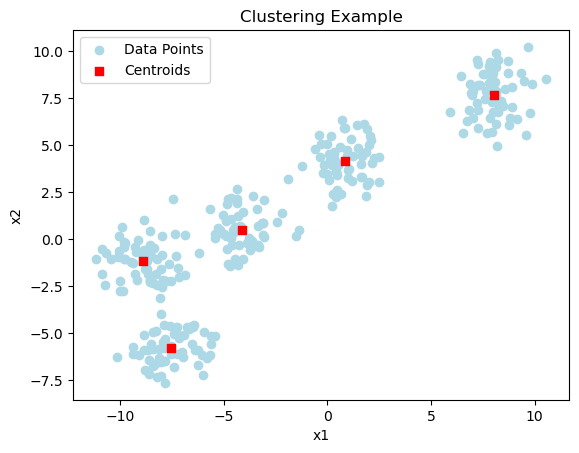

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(X[:, 0], X[:, 1], marker = 'o', color = 'lightblue', label = 'Data Points' )
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], marker = 's', color = 'red', label = 'Centroids')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Clustering Example')
plt.legend()
plt.show()

In [9]:
# in Kmeans class , **transform()** measures the distance from each instance of every centroid
import pandas as pd
import numpy as np

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]]) 
print('X_new cluster Predication', kmeans.predict(X_new))

kmeans.transform(X_new).round(2) # distance of X_new points from each cluster point

X_new cluster Predication [0 0 3 3]


array([[ 2.33,  9.42,  9.84,  4.39, 10.83],
       [ 3.07, 12.29,  7.59,  7.28, 13.09],
       [ 4.02,  7.2 , 11.98,  2.76,  9.88],
       [ 4.19,  6.93, 12.18,  2.31,  9.44]])

- **the affinity score or similarity score** in clustering often refers to how close or similar a point is to the center or centroid of its cluster.
- In certain clustering algorithms like **K-means, the distance between a point and its associated cluster centroid is used as a measure of similarity (or inversely, dissimilarity)**
  - in K-means clustering, the similarity score is inversely proportional to the squared Euclidean distance from the centroid. 
  - The goal is to minimize this distance for all points, assigning each point to the cluster with the nearest centroid

### 1.1.1 Hard Clustering vs. Soft Clustering

- In clustering, the goal is to group similar data points together. 
- There are two primary approaches to achieve this: hard clustering and soft clustering.

**Hard Clustering**
  - **Discrete Assignment**: Each data point is **assigned exclusively to one and only one cluster**. There's no ambiguity about membership.
  - Clear Boundaries: Clusters have well-defined boundaries, and there's no overlap between them.
  - Common Algorithms: **K-means, DBSCAN, Hierarchical Clustering**
  - **When to use** : When you need clear-cut categories or when data points are expected to belong to only one group    
      - (e.g., customer segmentation based on demographics).


**Soft Clustering** 
  - **Probabilistic Assignment**: Data points can **belong to multiple clusters** with varying degrees of probability.
  - Fuzzy Boundaries: Clusters can overlap, and a data point may have partial membership in several clusters.
  - Common Algorithms: **Fuzzy C-means, Gaussian Mixture Models**
  - **When to use**: When data points can have multiple interpretations or when you want to model uncertainty 
     - (e.g., topic modeling in natural language processing)

### 1.1.2 K-Means Algorithm

- suppose we are given centroids, we can easily label all the instances in dataset by assigning a cluster, whose centroid is nearer to it
- Conversly, if you were given given all the instance labels, we could easily locate the centroid for each cluster by computing the mean of the instances of that cluster

**But if neither centroid or label is provided**  then how to proceed
  - **Initial Centroid Selection**: Start by randomly selecting k(say 5, here) centroids from the data points.

  - **Assign Labels (Clustering)**: For each data point, calculate the distance to each of the 5 centroids and assign the point to the cluster with the closest centroid (i.e., label each point based on the nearest centroid).

  - **Update Centroids**: Once all points are labeled, update each centroid by calculating the mean of all the data points in each cluster (this gives the new centroid).

  - **Repeat the Process**:

    - **Recalculate the distance from all data points to the updated centroids (not just points in that cluster)**.
    - **Reassign points** (label them again) based on the new centroids.
    - **Update centroids** based on the newly labeled data.
  - **until the centroids stop moving**


**Convergence**: This process of relabeling and updating continues until the centroids stop moving, meaning the clusters have stabilized.
  - **The algorithm is guaranteed to converge in a finite number of steps (usually quite small)**. 
      - That’s because the **mean squared distance between the instances and their closest centroids can only go down at each step, and since it cannot be negative, it’s guaranteed to converge**.
  - **Short Video Link** https://www.youtube.com/watch?v=R2e3Ls9H_fc

**The computational complexity** of the algorithm is generally 
 - **linear with regard to the number of instances m, the number of clusters k, and the number of dimensions n**.   
 - However, this is only true when the data has a clustering structure. 
 - If it does not, then in the worst-case scenario the complexity can increase exponentially with the number of instances. 
 - In practice, this rarely happens, and **k-means is generally one of the fastest clustering algorithms**.`

**Although the algorithm is guaranteed to converge, it may not converge to the right solution (i.e., it may converge to a local optimum): whether it does or not depends on the centroid initialization**.

### 1.1.3 Centroid Initialization Methods

- **Model inertia in clustering**, also known as the within-cluster sum of squares (WCSS), is a metric used to evaluate the quality of a clustering model. 
  - It measures the compactness of the clusters formed by the algorithm.
  - which is the sum of the squared distances between the instances and their closest centroids
  
**Interpretation**:

- Lower Inertia: A lower inertia value indicates that the data points are more tightly clustered around their respective centroids, suggesting a better clustering model.
- Higher Inertia: A higher inertia value implies that the data points are more scattered within their clusters, indicating a less effective clustering.


**In K-means clustering**:

- The algorithm aims to minimize the inertia by iteratively assigning data points to the nearest centroid and recalculating centroids.
- The convergence of the algorithm is often determined by the stabilization of the inertia value.

In [10]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]]) # if you know good intial good points for centroids, otherwise it will pick randomly
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42) # n_init: tells how many times we have initialize the model with different centroids
# here as we know, where to keep centroids , because of which n_init = 1, will run only once
kmeans.fit(X) # when we don't provide initial cordinates of centroid, by default it will pick 10 different times starting centroids, can be manully controlled with 'n_init' param

# fit store the best soultion, best on model's inertia

kmeans.inertia_

615.8619047588262

In [11]:
kmeans_2 = KMeans(n_clusters=5,  n_init=14, random_state=42)
kmeans_2.fit(X) 
kmeans_2.inertia_

615.8619047588262

### 1.1.4 Kmeans++ clustering

**K-means++** is a variation of the K-means clustering algorithm that aims to improve the quality of the initial centroids, leading to better clustering results. Here's how it works:

- **1. Choose the First Centroid**:
    - Select the first centroid randomly from the dataset.

- **2. Compute the distance**:
   - For each remaining data point, calculate the squared Euclidean distance to the nearest already chosen centroid. Let’s call this distance D(x), where x is a data point

- **3. Select the next centroid**:
  - Choose the next centroid with a probability proportional to D(x). Points that are farther from the existing centroids have a higher chance of being selected as new centroids
     $$P(x) = D(x)^2 / Σ_{y∈dataset} D(y)^2$$

- **4. Repeat**:
Repeat the distance calculation and selection process until K centroids are chosen.

- **5. Proceed with standard K-means**:
   - After initializing the K centroids, proceed with the regular K-means algorithm (assign points to the nearest centroids, update centroids, and repeat).
   
- Video Link: https://www.youtube.com/watch?v=KgJNIMe4yVc
   
**Why is K-means++ better?**
 - **Better initialization**: It reduces the chance of ending up with suboptimal clusters by ensuring centroids are spread across the dataset.
- **Faster convergence**: By starting with better initial centroids, K-means++ typically requires fewer iterations to converge than the random initialization method.



### 1.1.5 Accelerated k-means and mini-batch k-means

Accelerated K-means and Mini-batch K-means are variants of the traditional K-means clustering algorithm designed to improve its efficiency and scalability, particularly for large datasets.

| Feature | Accelerated K-means | Mini-batch K-means |
|---|---|---|
| **Focus** | Optimization of distance calculations and centroid updates | Reduced computational cost through mini-batches |
| **Approach** | Uses techniques like approximate nearest neighbors and parallel processing | Samples subsets of data for processing |


**When to Use**
- Accelerated K-means: When you need to improve the overall speed of the K-means algorithm, especially for large datasets or computationally expensive distance calculations.
- Mini-batch K-means: When dealing with extremely large datasets that don't fit into memory or when you need to reduce computational time.

In [12]:
# using in scikit learn

acc_kmeans = KMeans(n_clusters = 5, random_state = 42, algorithm = 'elkan', n_init = 10) # accelarted kmeans algo developed by Charles Elkan in 2003
acc_kmeans.fit(X)

acc_kmeans.inertia_

615.8619047588262

In [13]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters = 5, random_state =42, n_init = 10)
minibatch_kmeans.fit(X)
minibatch_kmeans.inertia_

616.4478490494078

### 1.1.6 Finding the optimal number of clusters

- The K and inertia plot (also known as the Elbow Method) is a technique used to determine the optimal number of clusters K in K-means clustering. 
- It involves plotting the inertia (or within-cluster sum of squares) for different values of K, and then analyzing the curve to find the best value of K.

- **Inertia measures how spread out the points are within a cluster**.
  - **It’s the sum of squared distances between each data point and its corresponding cluster centroid**
  
**K and Inertia Plot**:

- The X-axis represents the number of clusters K.
- The Y-axis represents the inertia.
- As K increases, the inertia decreases because adding more clusters reduces the average distance between points and their centroids.
- **the curve often contains an inflexion point called the elbow**
   - **the inertia drops very quickly as we increase k**

**Silhouette Score**

- The Silhouette Score is another useful metric to evaluate the quality of clusters and to help determine the optimal number of clusters K in clustering algorithms like K-means. 
- Unlike the inertia method, which focuses on within-cluster distances, the Silhouette Score considers both within-cluster cohesion and between-cluster separation.

**What is the Silhouette Score**?

- The Silhouette Score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to +1:

  - +1: The point is well clustered (i.e., far from other clusters and close to its own cluster).
  - 0: The point is on or very close to the decision boundary between two clusters.
  - -1: The point is likely in the wrong cluster.
- **it is calculated for each data point individually. However, we can also calculate an average silhouette score to evaluate the overall quality of a clustering model**


**Steps for Finding best K with Silhoutte Score**

- Run k-means for different K Value
- Calculate the silhoutte score for each K vlaue
- choose the k with highest Silhoutte Score



## 1.2 Limits of KMeans

- A spherical cluster in the context of K-means clustering is a cluster of data points that can be approximated by a sphere. This means that the points within the cluster are roughly equidistant from a central point


**K-Means is a popular and simple clustering algorithm, but it has several limitations. Here’s a detailed look at its constraints**

1. **K-means does assume spherical clusters**
   - Limitation: K-Means assumes clusters are spherical and equally sized, which may not be true in real-world datasets
   - Impact: It struggles to capture complex shapes like elongated, irregular, or overlapping clusters.
2. **Fixed Number of Clusters (K)**
    - Limitation: You need to predefine the number of clusters K before running the algorithm, but the right number of clusters isn't always known in advance.
    - Impact: Choosing the wrong K can lead to poor clustering results or over/under-clustering.
    
3. **Sensitive to Initial Centroid Selection**
   - Limitation: K-Means can converge to different solutions depending on the initial placement of centroids. Poor initialization can lead to suboptimal clustering.
   - Impact: This can result in getting stuck in local minima, leading to inconsistent results.
   - Solution: K-Means++ is a variation that improves the centroid initialization process.
   
4. **Sensitive to Outliers**
   - Limitation: K-Means is highly sensitive to outliers because it uses the mean of points to define clusters. Even a single outlier can significantly skew the centroid.
   - Impact: Outliers can cause large distortions in cluster assignments.
   
5. **Assumes Equal Cluster Size**
   - Limitation: K-Means works best when clusters have similar sizes. If clusters vary greatly in size, small clusters might be merged into larger ones, or large clusters might be divided into several smaller ones.
   - Impact: It can misclassify points by merging or splitting clusters unevenly.

6. **Difficulty with Non-Linear Boundaries**
   - Limitation: K-Means can only divide space with linear boundaries (hyperplanes), meaning it fails to capture complex, nonlinear separations in the data.
   - Impact: It struggles with data where clusters are not linearly separable or have curved boundaries.

7. **Hard Assignment of Points**
   - Limitation: K-Means uses a "hard assignment," meaning each point is assigned to exactly one cluster. In cases where data points may belong to multiple clusters (soft clustering), K-Means is not suitable.
   - Impact: Hard assignment can oversimplify situations where points are ambiguously close to multiple clusters.
   
8. **Needs Scaled Data**
   - Limitation: K-Means is sensitive to the scale of the features. Without proper scaling, features with larger ranges dominate the distance calculation.
   - Impact: Unscaled features can distort clustering results.

9. **Difficulty Handling Clusters of Different Densities**
   - Limitation: K-Means assumes that all clusters have a similar density. It doesn't handle cases where some clusters are denser than others very well.
   - Impact: K-Means might merge dense clusters with sparse ones, causing inaccurate cluster formation.
   - **Practical Example**: Consider a dataset with two groups of data points:

     - Cluster A: 1000 points tightly packed in a small space.
     - Cluster B: 100 points spread across a larger space.
     - K-Means may:
         - Assign some points from Cluster B to Cluster A, believing they are closer to Cluster A's centroid, despite Cluster B being a valid, separate cluster.
         - Misinterpret Cluster A as having multiple clusters within it, due to minor variations in distances within the tightly packed points.

     - Real World Example: **Customer Segmentation**: If customers have different purchasing patterns, with some purchasing frequently (dense cluster) and others rarely (sparse cluster), K-Means might fail to capture this difference, grouping infrequent purchasers with frequent ones.


## 1.3 Using Clustering for Image Segmentation

**Image segmentation is the task of partitioning an image into multiple segments**. There are several variants:
  - **In color segmentation**:
     - pixels with a similar color get assigned to the same segment. This is sufficient in many applications.
     - For example, if you want to **analyze satellite images to measure how much total forest area there is in a region**, color segmentation may be just fine.
  - **In semantic segmentation**:
     - all pixels that are part of the same object type get assigned to the same segment. 
     - For example, **in a self-driving car’s vision system, all pixels that are part of a pedestrian’s image might be assigned to the “pedestrian” segment** (there would be one segment containing all the pedestrians).
  - **In instance segmentation**, 
    - all pixels that are part of the same individual object are assigned to the same segment. 
    - In this case there would be a different segment for each pedestrian.
    
    
#### -- -- -- -- --

- The state of the art in semantic or instance segmentation today is achieved using complex architectures based on convolutional neural networks . 
- here, we are going to focus on the (much simpler) color segmentation task, using k-means



In [14]:
# conda install -c anaconda pillow

In [15]:
from PIL import Image

In [16]:
import PIL
import numpy as np
import pandas as pd

In [17]:
image = np.asarray(PIL.Image.open('/Users/saajanrajak/2024 Projects/2024_05 Machine Learning/Images/ladybug.png'))
image.shape

(533, 800, 3)

- The image is represented as a 3D array (cube type data structure). 
  - The first dimension’s size is the height; 
  - the second is the width; and 
  - the third is the number of color channels, in this case red, green, and blue (RGB). 
    - In other words, for each pixel there is a 3D vector containing the intensities of red, green, and blue as unsigned 8- bit integers between 0 and 255
    
- **Some images may have fewer channels** 
    - such as **grayscale images**, which only have one, and 
- **some images may have more channels** 
    - such as images with an additional alpha channel for transparency, or 
    - **satellite images, which often contain channels for additional light frequencies (like infrared)**.
    
### -- -- -- -- 

Structure of a 3D Array
The image can be represented as a 3D array with the following dimensions:

  - Height: Number of rows (vertical pixels in the image).
  - Width: Number of columns (horizontal pixels in the image).
  - Channels: The third dimension has three values (one each for Red, Green, and Blue).

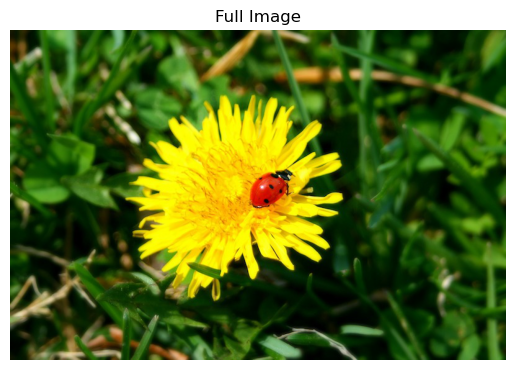

In [18]:
# Visualize the full image
import matplotlib.pyplot as plt

plt.imshow(image)
plt.title('Full Image')
plt.axis('off')  # Hide the axes
plt.show()

In [19]:
# Slice the first 3 rows, first 3 columns, and all 3 RGB channels
slice_3x3x3 = image[:3, :3, :]

# Print the shape of the slice to confirm it's 3x3x3
print("Shape of the slice:", slice_3x3x3.shape)

# Display the 3x3x3 slice values
print("First 3x3x3 values of the image array:")
print(slice_3x3x3)

Shape of the slice: (3, 3, 3)
First 3x3x3 values of the image array:
[[[25 29  2]
  [24 28  1]
  [24 29  0]]

 [[24 28  1]
  [23 27  0]
  [23 27  0]]

 [[23 27  2]
  [22 26  1]
  [22 26  0]]]


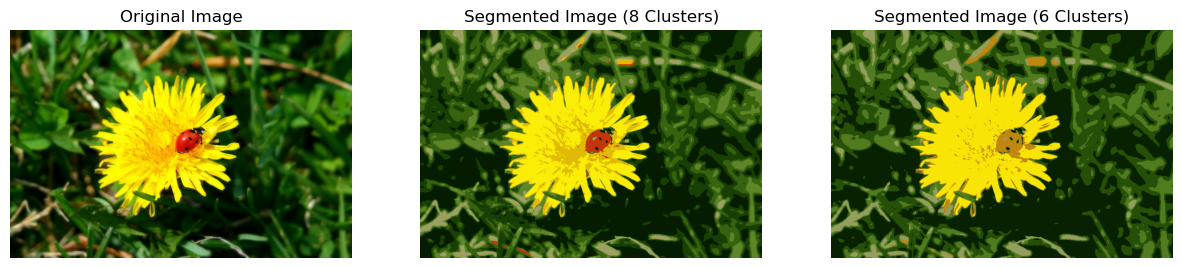

In [20]:

# Reshape the image into a 2D array where each row is a pixel and each column is a color channel (R, G, B)
X = image.reshape(-1, 3)

# Apply KMeans to the pixel data
kmeans_8c = KMeans(n_clusters=8, random_state=42, n_init = 10).fit(X)
kmeans_6c = KMeans(n_clusters=6, random_state=42, n_init = 10).fit(X)

# Replace each pixel with the RGB value of its assigned cluster's center
segmented_img_8c = kmeans_8c.cluster_centers_[kmeans_8c.labels_]
segmented_img_6c = kmeans_6c.cluster_centers_[kmeans_6c.labels_]

# Reshape the segmented image back to its original shape
segmented_img_8c = segmented_img_8c.reshape(image.shape)
segmented_img_6c = segmented_img_6c.reshape(image.shape)

# Convert the pixel values back to integer type (0-255) for visualization
segmented_img_8c = segmented_img_8c.astype(np.uint8)
segmented_img_6c = segmented_img_6c.astype(np.uint8)

# Plot the original image and the clustered image side by side
plt.figure(figsize=(15,5))

# Original image
plt.subplot(1, 3, 1)  # Adjusting to (1, 3, 1) for three images in one row
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')  # Hide axis

# Segmented image with 8 clusters
plt.subplot(1, 3, 2)
plt.title('Segmented Image (8 Clusters)')
plt.imshow(segmented_img_8c)
plt.axis('off')  # Hide axis

# Segmented image with 6 clusters
plt.subplot(1, 3, 3)
plt.title('Segmented Image (6 Clusters)')
plt.imshow(segmented_img_6c)
plt.axis('off')  # Hide axis

plt.show()

- experiment with various numbers of clusters, as shown in the figure. 
- When you use fewer than eight clusters, notice that the ladybug’s flashy red color fails to get a cluster of its own: **it gets merged with colors from the environment**. 
- **This is because k-means prefers clusters of similar sizes**. 
- The ladybug is small—much smaller than the rest of the image—so even though its color is flashy, k-means fails to dedicate a cluster to it.

## 1.4 Using Clustering for Semi-Supervised Learning

- we can use clustering **Semi-Supervised Learning**
   - where only a small portion of the data is labeled, and the rest is unlabeled


**Some ways of how clustering may help in Semi Supervised Learning**
- **Label Propagation**
   - Clustering can group similar instances together, allowing labeled data points to propagate their labels to nearby unlabeled points within the same cluster. 
   - The assumption is that data points within the same cluster are likely to have the same label.
   - This allows the model to leverage the structure of the data to infer labels for the unlabeled points.

     - Example: In a classification problem with two classes, if some data points are labeled, clustering can help identify other similar data points in the same group and assign the same labels.
     
- **Pseduo Labeling**
   - After an initial classifier assigns labels to unlabeled data, clustering can help check if the labeled points in the same cluster belong to the same class.


In [21]:
# Label Propogation example
# assume we have only 50 instances that are labelled for mnist data, let's see how clustering may help in predication

from sklearn.datasets import load_digits


X_digits, y_digits = load_digits(return_X_y = True)
print('Full Data shape', X_digits.shape)

X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:],y_digits[1400:]

print('train X shape', X_train.shape)
print('train y shape', X_test.shape)

Full Data shape (1797, 64)
train X shape (1400, 64)
train y shape (397, 64)


In [22]:
# lets train a logistic regression, for the 50 cases where we know the lables

from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter = 10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [23]:
log_reg.score(X_test, y_test)  # 74% accuracy, not good, training all full training set, accuracy score reach 90%

0.7481108312342569

In [24]:
# Lets cluster the training set into 50 clusters

kmeans = KMeans(n_clusters =50, random_state = 42, n_init = 10)
X_digits_dist = kmeans.fit_transform(X_train, )
X_digits_dist[:2] # first two row (or observation) distance to all 50 clusters

array([[53.8347602 , 41.42507119, 40.38645515, 17.13112106, 48.85122771,
        41.37911798, 50.41445094, 46.6183058 , 37.70805617, 31.71080258,
        46.02143023, 42.39464065, 49.15410868, 54.62814813, 44.30422606,
        49.33810176, 48.04961428, 45.37603431, 39.2178153 , 57.83813621,
        51.35350467, 52.48685249, 42.9829848 , 39.70119879, 46.55218006,
        39.64730445, 50.16193645, 42.55561337, 43.382184  , 35.3764855 ,
        54.95314141, 41.0443903 , 11.64839782, 44.25494323, 40.94787412,
        41.2640159 , 42.76732392, 41.62795429, 44.81572321, 47.18672246,
        41.49620688, 56.60965269, 19.51000233, 46.54469775, 35.36610156,
        50.81598146, 38.57955457, 46.70298587, 43.32913642, 41.73144964],
       [22.96665235, 50.3636375 , 45.70161035, 56.42098156, 43.26017162,
        43.58225812, 46.95580511, 43.49072207, 41.10532204, 49.5451814 ,
        46.96440106, 43.86690729, 42.48772058, 41.14623125, 43.97102062,
        41.28119638, 26.78284876, 39.40611162, 43.

In [25]:
representative_digit_idx = np.argmin(X_digits_dist, axis =0) 
# for each cluster, we’ll find the image closest to the centroid. We’ll call these images the representative images:
print(representative_digit_idx)
X_representative_digits = X_train[representative_digit_idx]

[1120  708  582  925  597  384  798  970  768  815  885 1387  870  141
 1084   88 1030  310 1312  972  410 1168  213  579  612 1315  463 1075
 1005  199  558  613  877 1352 1327  259 1114  652  983  115 1328 1050
 1336  543  938 1227  881  685  345  438]


In [26]:
X_representative_digits[1]

array([ 0.,  0.,  4., 13., 16., 11.,  0.,  0.,  0.,  9., 16.,  9., 10.,
       15.,  0.,  0.,  0.,  5.,  4.,  0., 12., 11.,  0.,  0.,  0.,  0.,
        0.,  5., 16., 12.,  1.,  0.,  0.,  0.,  0.,  1.,  9., 15.,  8.,
        0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  1.,  6.,
        8., 16.,  8.,  0.,  0.,  0.,  5., 16., 15.,  9.,  1.,  0.])

- **np.argmin** finds the index of the minimum value along a specified axis.
- Here, axis=0 means it's looking at each column (i.e., each cluster) and finding the index of the minimum value in that column. 
  - In other words, **for each cluster, it finds the index of the data point in X_train that is closest to that cluster center**.
- This gives a 1D array of length 50 (because there are 50 clusters), where each element in the array is the index of the data point in X_train that is the closest to the corresponding cluster.

### -- -- -- -- -- 

- Performs K-means clustering on the training data.
- Identifies the representative data points for each cluster, which are the data points closest to their respective cluster centroids.
- These representative data points can be used to visualize or interpret the clusters.

In [27]:
y_representative_digits = np.array([1,3,6,0,7,9,2,4,8,9, 
                                    5,4,7,1,2,6,8,2,5,1,
                                    4,1,3,3,8,8,2,5,6,9,
                                    1,4,0,6,8,3,4,6,7,2,
                                    4,1,0,7,5,1,9,9,3,7])

In [28]:
log_reg = LogisticRegression(max_iter = 10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test) # with 

0.8261964735516373

- jumped from 74.8% accuracy to 84.9%, although we are still only training the model on 50 instances. 
- Since it is often costly and painful to label instances, especially when it has to be done manually by experts, it is a good idea to label representative instances rather than just random instances.


- NCY, will add more here later

## 1.5 DBSCAN

**What is DBSCAN**?
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular density-based clustering algorithm that groups together points that are close to each other (based on a distance measurement like Euclidean distance) and marks points that lie alone in low-density regions as outliers.

**How DBSCAN Works**:
  - **Core Points**: A point is considered a core point **if it has at least a minimum number of neighboring points (min_samples) within a certain radius (eps)**. These points form the heart of dense regions (clusters).

  - **Border Points**: A point is considered a border point **if it is not a core point but is within the eps distance of a core point**. Border points are part of a cluster but are not dense enough to form their own cluster.

  - **Noise Points (Outliers)**: A point is considered noise if it is neither a core point nor a border point. Noise points do not belong to any cluster.

  - **Cluster Formation**: DBSCAN forms clusters by starting from a core point and recursively including all reachable points (core or border) that are within eps distance. This continues until no more points can be added to the cluster.
  - **must watch** [link: https://www.youtube.com/watch?v=4AW_5nYQkuc]

**Applications of DBSCAN**:
- **Anomaly detection**: DBSCAN naturally identifies outliers (points in low-density regions) as noise, which makes it useful for anomaly detection tasks.
- **Geospatial data analysis**: DBSCAN works well for clustering points on a map (e.g., finding hotspots of activity or customer locations).
- **Market segmentation**: Can be used to find dense regions of customers with similar purchasing behavior.
- **Image processing**: DBSCAN can be used for image segmentation and detecting regions of interest in an image

**Pros of DBSCAN**:
- No need to specify the number of clusters: Unlike algorithms like k-means, DBSCAN does not require specifying the number of clusters in advance.
- **Identifies outliers**: It can detect noise points that do not belong to any cluster, making it useful for anomaly detection.
- **Works well with arbitrarily shaped clusters**: DBSCAN can identify clusters of various shapes, unlike k-means, which tends to form spherical clusters.
- **Resistant to outliers**: Unlike k-means, DBSCAN is not sensitive to outliers because it can label them as noise.


**Cons and Limitations of DBSCAN**:
- **Choice of eps is crucial**: The performance of DBSCAN heavily depends on choosing an appropriate eps value. Too small an eps can lead to many clusters (or no clusters), while too large an eps can merge distinct clusters.

- **Difficulty in handling varying density**: DBSCAN assumes a global density (defined by eps and min_samples). If the dataset has clusters of different densities, DBSCAN may fail to detect them correctly.

- **High-dimensional data**: In high-dimensional spaces, the concept of density becomes less meaningful, and DBSCAN may struggle to form meaningful clusters. This phenomenon is known as the curse of dimensionality.

- **Computational complexity**: DBSCAN has a time complexity of O(n²) in the worst case, making it less efficient for large datasets compared to algorithms like k-means, which have better scalability.

**the DBSCAN class has a method called fit_predict(), but it lacks a predict() method**. 
   - This design choice highlights a fundamental limitation of density-based clustering algorithms like DBSCAN: **they are not inherently suitable for classifying new, unseen data points**.
   
   - **Cluster Formation in DBSCAN is Static**:

     - DBSCAN creates clusters based on the density of the data points available at the time of clustering. Once the clusters are formed, DBSCAN doesn’t generate a model that can assign new data points to those clusters.
      - DBSCAN is not based on centroids (as in k-means) or boundaries (as in SVM), where a model can use those centroids or boundaries to classify new points. It only looks at the density relationships between the points in the original dataset.
      
   - **Clusters in DBSCAN are Arbitrarily Shaped**:

     - Unlike algorithms that create geometric decision boundaries (like k-means, which forms spherical clusters), DBSCAN clusters can have arbitrary shapes. This makes it hard to define a universal rule or formula to assign a new data point to an existing cluster.
     - The assumption behind DBSCAN is that a new point would have to be compared to the density structure of the data, which can change dramatically as new points are added. Thus, the clusters formed with the initial data may not apply to new points.
   

   

In [29]:
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=4) 
dbscan.fit(X)

DBSCAN(eps=0.05, min_samples=4)

- some instances have a cluster index equal to –1, which means that they are considered as anomalies by the algorithm. 
- The indices of the core instances are available in the **core_sample_indices_** instance variable, and 
- the core instances themselves are available in the **components_** instance variable

In [30]:
np.unique(dbscan.labels_, return_counts = True)

(array([-1,  0,  1,  2,  3,  4,  5]),
 array([ 52, 306, 208, 266, 160,   4,   4]))

**The Role of fit_predict()**:
  - fit_predict() is a convenience method that performs two steps:
  - Fit: It runs the DBSCAN algorithm on the data, identifying clusters and outliers.
  - Predict: It immediately returns the cluster labels for the training data points.
  
**How to Handle New Data Points**:
Since DBSCAN cannot directly predict clusters for new points, users have the flexibility to decide how to handle this situation. Here are some common strategies:

  - **Re-run DBSCAN on the entire dataset (including new points)**:

    - we can rerun DBSCAN on both the old and new data, treating the new points as part of the entire dataset. However, this can be computationally expensive, especially for large datasets, as DBSCAN has a time complexity of O(n²) in the worst case.
  - **Train a separate classification model**:

    - A common workaround is to treat the cluster labels from DBSCAN as "pseudo-labels" and use them to train a traditional supervised classification model, such as k-NN, decision trees, or SVMs. This model can then be used to predict cluster membership for new data points

In [31]:
#using KNN 

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [32]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
print('X New Predication', knn.predict(X_new))


knn.predict_proba(X_new)
                                       
                    

X New Predication [1 3 2 0]


array([[0.  , 0.84, 0.  , 0.08, 0.08, 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.22, 0.  , 0.78, 0.  , 0.  , 0.  ],
       [0.98, 0.  , 0.  , 0.  , 0.  , 0.02]])

In [33]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  3,  2, -1])

**what does ravel do**
Flattening: y_pred.ravel() converts the y_pred array into a contiguous one-dimensional array. 
It takes all elements from y_pred and concatenates them into a single row while maintaining the order of elements.


**Summary**
- DBSCAN is a very simple yet powerful algorithm capable of identifying any number of clusters of any shape.
- It is robust to outliers, and it has just two hyperparameters (eps and min_samples). 
- If the density varies significantly across the clusters, however, or if there’s no sufficiently low- density region around some clusters, DBSCAN can struggle to capture all the clusters properly. 
- Moreover, its computational complexity is roughly O(m2n),

## 1.6 Other Clustering Algorithms

**Agglomerative Clustering**
Agglomerative clustering is a hierarchical clustering method that builds a tree of clusters by repeatedly merging the closest pairs of clusters based on a distance metric. It creates a dendrogram that visualizes the relationships between clusters.

**BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)**
BIRCH is designed for large datasets and incrementally builds a clustering feature tree. It first summarizes the dataset into a compact representation and then applies a clustering algorithm on these summaries, making it efficient for handling large-scale data.

**Mean Shift**
Mean shift is a centroid-based clustering algorithm that iteratively shifts data points towards the mean of their neighboring points. It finds dense regions in the data distribution and can detect clusters of arbitrary shapes without needing to specify the number of clusters.

**Affinity Propagation**
Affinity propagation is a clustering algorithm that identifies exemplars among the data points and forms clusters based on message passing between data points. It does not require the number of clusters to be specified in advance and can handle clusters of varying sizes.

**Spectral Clustering**
Spectral clustering uses the eigenvalues of a similarity matrix to reduce dimensionality before applying a clustering algorithm (like k-means). It’s effective for identifying complex cluster structures, particularly when clusters are not well-separated in the feature space.

## not in seq

**2.1 A Gaussian distribution** 
  - (also known as a normal distribution) is a continuous probability distribution characterized by its bell-shaped curve. 
 - It is widely used in statistics to represent real-valued random variables whose distributions are unknown or naturally occurring.

**Key Properties of Gaussian Distribution**:
  - Symmetry: It is symmetric around the mean, with equal data on both sides.
  - Mean and Standard Deviation: The curve is defined by two parameters:
      - Mean (µ): The center of the distribution.
      - Standard deviation (σ): Controls the width/spread of the curve.
  - 68-95-99.7 Rule:
      - 68% of data falls within 1 standard deviation from the mean.
      - 95% within 2 standard deviations.
      - 99.7% within 3 standard deviations.
**Characteristics**:
  - Unimodal: It has a single peak.
  - Most Common in Nature: Many natural phenomena (e.g., heights, IQ scores) approximate a Gaussian distribution.


# 2. Gaussian Mixtures Models

**Mixture Models**:
- A mixture model is a probabilistic model that assumes the data is generated from a combination of several different probability distributions, where each distribution represents a cluster or component of the data. 
- The model does not assume which component generated each observation, so it tries to infer the underlying distribution and their respective probabilities.

- General Definition: A mixture model is defined as: 
        $$ p(x) = ∑_{i=1}^k π_i * p_i(x)$$

  Where: 
  - `p(x)` is the overall probability density function.
  - $p_i(x)$ is the probability density function of the 
  - `k` is the number of Gaussian components in the mixture
  - $π_i$ is the weight (**mixing coefficient**) for the i-th component (with $∑π_i=1$).

- Components: **The individual distributions (components) can belong to different families of distributions, such as Gaussian, Poisson, or Exponential**.

**A Gaussian Mixture Model (GMM)**
- A Gaussian Mixture Model (GMM) is a specific type of mixture model **where all the components are Gaussian (normal) distributions** and whose parameters are unknown. 
- GMM is one of the most commonly used mixture models because it is flexible and can represent complex, multimodal data distributions by combining multiple Gaussians.

- **All the instances generated from a single Gaussian distribution form a cluster that typically looks like an ellipsoid**. 
   - **The shape and orientation of the ellipsoid are determined by the covariance matrix of the Gaussian**
   
- **Must watch Video** - https://www.youtube.com/watch?v=atDp5bkzej4


### -- -- -- -- --

Definition: In a GMM, each $p_i(x)$  is a Gaussian distribution:

$$p(x) = \sum_{i=1}^{k} \pi_i \cdot \mathcal{N}(x | \mu_i, \Sigma_i)$$

  - **$N(x∣μ_i)$** is the Gaussian distribution with mean $u_1$ and covariance matrix $Σi$ for the $i_th$ component
  - **$π_i$** is the mixing coefficient for the $i_th$ Gaussian with $∑_{i=1}^k π_i = 1$
     - $π_1$ ≥0 for all i (non-negative).
  - $\cdot \mathcal{N}(x | \mu_i, \Sigma_i)$: This term represents a Gaussian (normal) distribution for the i-th component. It gives the probability density for the data point x under the $i-th$ Gaussian.
  
     - $\mu_i$: The mean vector for the i-th Gaussian component, which represents the center of the ellipsoidal cluster formed by that Gaussian
     - $\Sigma_i$: The covariance matrix for the $i-th$ Gaussian component, which defines the spread and orientation of the cluster. 
        - **If $\Sigma_i$ is a diagonal matrix, the cluster is spherical**.
        - **If it has  off-diagonal matrix, the cluster will be ellipsoidal**
  
  


**The Basic GMM**

- GMM has several variants, and the simplest variant is implemented in the GaussianMixture class in libraries like Scikit-learn. 
  - **In this variant, the number of Gaussian components (clusters), k, must be known or specified in advance**.

 - **Cluster Selection**: Each data point is assigned to one of the k clusters randomly. The probability of choosing the j-th cluster is given by its weight φ(j).
 - **Data Generation**: Once a cluster is selected, the data point is sampled from a Gaussian distribution with mean μ(j) and covariance matrix Σ(j). 
   - This means that the data points within a cluster are assumed to be drawn from a Gaussian distribution.

In [34]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components = 3, n_init = 10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [35]:
gm.weights_

array([0.20290963, 0.21181639, 0.58527398])

In [36]:
gm.means_

array([[-0.74071685,  0.55355698],
       [ 1.72326819, -0.07572955],
       [ 0.48919206,  0.26125126]])

In [37]:
gm.covariances_

array([[[ 0.0530764 ,  0.06222748],
        [ 0.06222748,  0.08702285]],

       [[ 0.062059  ,  0.06655204],
        [ 0.06655204,  0.08868573]],

       [[ 0.16410332, -0.09537358],
        [-0.09537358,  0.28536484]]])

In [38]:
X.shape

(1000, 2)

**The Expectation-Maximization (EM) algorithm in Gaussian Mixture Models (GMM) works as follows**:

  - **Initialization**: Randomly initialize the parameters (means, covariances, and weights) for each Gaussian component.

  - **E-Step (Expectation)**: Calculate the probability (responsibility) that each data point belongs to each Gaussian component, based on the current parameters.

  - **M-Step (Maximization)**: Update the parameters (means, covariances, and weights) by maximizing the likelihood of the data, using the responsibilities from the E-step.

  - **Repeat**: Alternate between the E-step and M-step until the parameters converge, meaning the changes in parameters become very small.

This process helps GMM find the best-fit Gaussian distributions for the data.

**Expectation-Maximization (EM) vs. K-Means: A Comparison**

Key Similarities

 - **Iterative Nature**: Both algorithms are iterative, meaning they repeat a series of steps until a convergence criterion is met.
 - **Random Initialization**: Both algorithms initialize cluster parameters randomly.
 - **Assignment and Update Steps**: Both algorithms involve an assignment step, where data points are assigned to clusters, and an update step, where cluster parameters are refined.
 
 
## EM vs. K-Means: A Comparison

| Feature | EM Algorithm | K-Means Algorithm |
|---|---|---|
| **Nature** | Probabilistic | Deterministic |
| **Assignment** | Probabilistic (based on posterior probabilities) | Deterministic (based on Euclidean distance) |
| **Parameter Update** | Uses expectation-maximization | Updates cluster centers as the mean of assigned data points |
| **Convergence** | May take longer due to probabilistic nature | Typically faster due to deterministic nature |
| **Flexibility** | More flexible due to probabilistic framework | Less flexible due to deterministic nature |
| **Assumptions** | Assumes data is generated from a mixture of Gaussian distributions | Assumes data is clustered around spherical shapes |

- In the context of clustering, we can think of **EM as a generalization of k-means that not only finds the cluster centers (μ(1) to μ(k)), but also their size, shape, and orientation (Σ(1) to Σ(k)), as well as their relative weights (φ(1) to φ(k))**. 
- **Unlike k-means, though, EM uses soft cluster assignments, not hard assignments**. 
- For each instance, during the expectation step, the algorithm estimates the probability that it belongs to each cluster (based on the current cluster parameters).
- Then, during the maximization step, each cluster is updated using all the instances in the dataset (entire), with each instance weighted by the estimated probability that it belongs to that cluster. 
   - These probabilities are called the responsibilities of the clusters for the instances. 
- During the maximization step, each cluster’s update will mostly be impacted by the instances it is most responsible for
-  just like k-means, EM can end up converging to poor solutions, so it needs to be run several times, keeping only the best solution. This is why we set n_init to 10. Be careful: **by default n_init is set to 1**.

In [39]:
# we can check whether or not the algorithm converged and how many iterations it took

print('GMM Converged', gm.converged_)
print('Number of Iteration', gm.n_iter_)

GMM Converged True
Number of Iteration 15


As we have an estimate of the location, size, shape, orientation, and relative weight of each cluster, 
  - the model can easily assign each instance to the most likely cluster (hard clustering) or 
  - estimate the probability that it belongs to a particular cluster (soft clustering). 
    - **Just use the predict() method for hard clustering, or the predict_proba() method for soft clustering**:

In [40]:
gm.predict(X[:10])

array([1, 0, 2, 2, 2, 2, 0, 2, 1, 2])

In [41]:
gm.predict_proba(X[:10])

array([[3.27892983e-227, 9.89969341e-001, 1.00306592e-002],
       [9.99828617e-001, 1.12707475e-160, 1.71382643e-004],
       [1.54565267e-004, 6.32657135e-119, 9.99845435e-001],
       [5.00450478e-034, 2.82549136e-059, 1.00000000e+000],
       [2.38442123e-123, 1.47348845e-009, 9.99999999e-001],
       [4.53843744e-005, 1.95336246e-116, 9.99954616e-001],
       [9.95774709e-001, 8.58211780e-163, 4.22529074e-003],
       [9.11353379e-006, 1.95775755e-115, 9.99990886e-001],
       [8.24044095e-230, 9.99735217e-001, 2.64782881e-004],
       [2.55348953e-086, 4.57646072e-021, 1.00000000e+000]])

**A Gaussian Mixture Model (GMM) is a generative model, meaning it can be used not only to classify or cluster data but also to generate new data points based on the learned model**. 
  - **This contrasts with discriminative models, which are only concerned with distinguishing between classes or clusters**


**Key Takeaways**:
- Generative: GMM is generative because it models how the data is distributed and allows us to generate new data points that resemble the original dataset.
- New Instances: The new instances are generated by first selecting a cluster probabilistically (using the cluster weights) and then sampling a data point from the corresponding Gaussian distribution for that cluster.


**The ability to generate new data points from a GMM has a variety of practical applications. Here's how and why it's needed, along with an example**

1. **Data Augmentation**
 - **Why Needed**: In many machine learning tasks, the available dataset might be small or imbalanced (e.g., not enough examples in some classes). Generative models like GMMs can help by creating synthetic data to augment the dataset, making models more robust.
 - **How It Helps**: GMM can create additional realistic data points by generating new samples from the learned distribution. These synthetic points are not mere duplicates but follow the statistical patterns learned from the original data, improving the generalizability of models.
 - **Example**: In a medical study, if you have limited patient data for certain types of diseases, you can use GMM to generate additional patient records that match the distribution of the real data, helping train machine learning models more effectively.

2. **Anomaly Detection**
 - **Why Needed**: In anomaly or outlier detection, you want to model the normal distribution of the data to detect rare, unusual cases.
 - **How It Helps**: GMM helps by learning the probability distribution of the normal data. Once you have this distribution, you can compare new data points against it. Points that are very unlikely to be generated from this distribution (low probability) can be flagged as anomalies.
 - **Example**: In fraud detection, GMM can model the normal transaction behavior of customers. If a new transaction doesn't fit the learned Gaussian distributions, it might be flagged as suspicious or fraudulent.

3. **Data Simulation and Probabilistic Modeling**
 - **Why Needed**: In many scenarios, especially in scientific research or simulations, you need to model real-world phenomena probabilistically and generate data that resembles reality.
 - **How It Helps**: GMM allows you to simulate new data points that are representative of the real-world process you are modeling. This can be valuable when testing hypotheses, building simulations, or validating models under different conditions.
 - **Example**: In finance, if you have data on the returns of certain stocks, a GMM can model the distribution of these returns and simulate future possible returns based on the learned parameters. This can help in risk analysis or portfolio simulation.


In [42]:
# lets create new instances using gmm model
X_new, y_new = gm.sample(6)

In [43]:
X_new

array([[-0.54171595,  0.64642079],
       [-0.95827161,  0.19355435],
       [-0.82041629,  0.37687752],
       [ 1.73479936,  0.16702628],
       [ 0.81411278,  0.53616649],
       [ 0.74090641, -0.4459817 ]])

In [44]:
y_new

array([0, 0, 0, 1, 2, 2])

- When there are many dimensions, or many clusters, or few instances, EM can struggle to converge to the optimal solution. 
- we might need to reduce the difficulty of the task by limiting the number of parameters that the algorithm has to learn
- One way to do this is to limit the range of shapes and orientations that the clusters can have. 
  - This can be achieved by imposing constraints on the covariance matrices
     - set the **covariance_type** hyperparameter to one of the following values:
        - **"spherical": All clusters must be spherical, but they can have different diameters (i.e., different variances).
       - **"diag"**: Clusters can take on any ellipsoidal shape of any size, but the ellipsoid’s axes must be parallel to the coordinate axes (i.e., the covariance matrices must be diagonal).
       - **"tied"**: All clusters must have the same ellipsoidal shape, size, and orientation (i.e., all clusters share the same covariance matrix).
     - By default, covariance_type is equal to **"full"**, which means that each cluster can take on any shape, size, and orientation (it has its own unconstrained covariance matrix)

## 2.1 Using Gaussian Mixtures for Anamaly Detection

**Gaussian Mixture Models (GMM) can be highly effective for anomaly detection** because they allow us to estimate the probability density of data. 
- In this approach, anomalies are identified as data points that fall in regions of low probability density, meaning they do not fit well with the overall data distribution.

**Key Concepts**:
 - **Threshold Density**: You set a threshold for the minimum density below which points are considered anomalies.
     - If a point has a density lower than the threshold, it's classified as an anomaly.
 - **Tuning the Threshold**:
     - If you have too many false positives (flagging normal points as anomalies), you can increase the threshold to be more lenient, meaning fewer points will be classified as anomalies.
     - If there are too many false negatives (failing to flag actual anomalies), you can lower the threshold, making the model stricter and more sensitive to outliers.

In [45]:
# Calculate densities (log-likelihood scores)
densities = gm.score_samples(X)

# Set threshold at the 2nd percentile
density_threshold = np.percentile(densities, 2)

# Flag anomalies (those below the threshold)
anomalies = X[densities < density_threshold]

In [46]:
anomalies

array([[-9.43794682e-01,  1.07768170e-02],
       [ 1.96140525e+00, -1.22444005e-01],
       [ 1.99760266e+00,  4.82969618e-01],
       [ 1.87226888e+00,  3.76343874e-01],
       [ 1.91094632e+00,  4.63126953e-01],
       [-3.03756101e-01,  8.12686315e-01],
       [ 2.02789791e+00,  5.45737450e-01],
       [ 1.92281643e+00,  4.03989586e-01],
       [-9.56308677e-01,  2.59663827e-02],
       [ 1.75832309e+00, -3.40389428e-01],
       [-8.87746440e-01,  1.23161812e-01],
       [ 1.96942439e+00,  4.53893946e-01],
       [-9.75140662e-01,  6.42416371e-04],
       [ 1.88391498e+00,  4.44961527e-01],
       [ 2.01862609e+00,  5.19640039e-01],
       [ 1.94623242e+00,  4.28549941e-01],
       [-9.62607594e-01, -1.37398344e-02],
       [ 1.97723445e+00,  4.96959110e-01],
       [ 1.94653032e+00,  4.54269377e-01],
       [ 2.06687780e+00,  5.13521689e-01]])

## 2.2 Selecting the Number of Cluster

**Why Inertia and Silhouette Score Don't Work for GMMs**:
 - **Inertia and Spherical Clusters**:

    - The inertia measure assumes that clusters are roughly spherical and of equal size, which is one of the assumptions of K-Means.
    - However, in GMMs, clusters can take the form of ellipsoids and have different sizes and densities. Inertia doesn't capture this variability well, and it could lead to poor cluster evaluation if the clusters aren't spherical.
 
 - **Silhouette Score and Cluster Shape**:

   - The silhouette score also assumes a certain geometric structure for clusters. It measures how close points are to the center of their own cluster compared to others.
   - With GMMs, clusters may overlap or vary in size and shape, making the silhouette score unreliable because it is heavily biased toward spherical clusters with little overlap.

**Some Effective methods for selecting number of clusters are AIC and BIC**

 - Both the BIC and the AIC penalize models that have more parameters to learn (e.g., more clusters) and reward models that fit the data well. 
   - They often end up selecting the same model. 
   - When they differ, the model selected by the BIC tends to be simpler (fewer parameters) than the one selected by the AIC, but tends to not fit the data quite as well (this is especially true for larger datasets)

In [47]:
# compute the BIC and AIC, call the bic() and aic() methods: need to plot for multiple k

print('bic', gm.bic(X))
print('aic', gm.aic(X))

# need to plot information Criterion (AIC and BIC) on y axis and x axis cluster count, wherever both get minimum, 

bic 2761.9801638032754
aic 2678.548324060579


## 2.3 Bayesian Gaussian Mixture Models

Instead of manually searching for the optimal number of clusters in a Gaussian Mixture Model (GMM), we can use the **BayesianGaussianMixture class in Scikit-learn, which automatically determines the number of clusters**.

**BayesianGaussianMixture**:
  - The BayesianGaussianMixture class extends the traditional GaussianMixture by applying a Bayesian approach to automatically infer the number of clusters. **It uses a variational inference method and Dirichlet Process priors to adjust the model complexity based on the data**.

  - Unlike the GaussianMixture class where you must specify the number of clusters k, BayesianGaussianMixture can adjust this dynamically by allowing for an upper bound on the number of clusters. The model will then effectively "turn off" unnecessary components (i.e., clusters) if they do not fit the data well.

**How It Works**:
 - Dirichlet Process Priors: This approach allows the model to potentially have an infinite number of components, but in practice, most of them will have very low weights (practically zero), so only a few active clusters remain.

- The model uses a variational inference technique to adjust the parameters of each cluster, including the number of clusters, during the fitting process.


**Key Parameters**:
n_components: This sets the maximum number of clusters the model can potentially find, but it won't necessarily use all of them.
weight_concentration_prior: This controls how strongly the model should prefer a smaller number of clusters. Lower values will encourage fewer clusters, while higher values allow more clusters.

In [48]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

array([0.13, 0.14, 0.13, 0.16, 0.13, 0.11, 0.1 , 0.  , 0.09, 0.  ])

## 2.4 Other Algorithms for Anomaly and Novelty Detection

**Anomaly Detection**:

  - Definition: Identifies rare instances that differ significantly from the majority of the data, often indicating critical incidents.
  - Training Data: Uses a dataset with both normal and anomalous instances.
  - Applications: Common in fraud detection, network security, and fault detection.
  - Example: Flagging unusual financial transactions.


**Novelty Detection**:

  - Definition: Focuses on identifying new or previously unseen patterns within a dataset that only contains normal instances.
 - Training Data: Trained exclusively on normal data, aiming to find deviations from this norm.
 - Applications: Useful for detecting emerging trends or changes.
 - Example: Identifying unusual network traffic patterns not seen before.

**Key Difference**:
 - **Anomaly Detection can recognize known anomalies, while Novelty Detection identifies new, unseen instances**

1. **Fast Minimum Covariance Determinant (MCD)**
- Description: Fast MCD is a robust statistical method used for estimating the covariance matrix of a dataset while minimizing the influence of outliers.
- How It Works: It identifies a subset of data points that are least influenced by outliers and calculates the covariance based on this subset.
- Application: Commonly used in anomaly detection and robust statistical modeling where outliers may skew results( **in particular to clean up a dataset**).

2. **Isolation Forest**
 - Description: A tree-based algorithm specifically designed for anomaly detection. (**Random Forest**)
 - How It Works: It isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the feature. Anomalies are more easily isolated due to fewer splits.
 - Application: Effective for high-dimensional datasets, often used in fraud detection and network security.

3. **Local Outlier Factor (LOF)**
 - Description: A density-based anomaly detection algorithm that identifies outliers based on local data density.
 - How It Works: It compares the local density of a point to that of its neighbors. Points with significantly lower density than their neighbors are considered outliers.
 - Application: Useful in datasets with varying densities, applicable in fraud detection and image processing.

4. **One-Class SVM**
 - Description: A variation of the Support Vector Machine (SVM) algorithm used for outlier detection.
 - How It Works: It learns a decision boundary around the majority class (normal instances) and identifies points outside this boundary as anomalies.
- Application: Often used in scenarios where the dataset contains mostly normal observations and few or no anomalies, such as quality control in manufacturing.

5. **Principal Component Analysis (PCA) and Other Dimensionality Reduction Techniques**
 - Description: Techniques to reduce the number of features in a dataset while retaining most of the variance/information.
 - How It Works: PCA projects the data onto a lower-dimensional space defined by the principal components (directions of maximum variance).
 - Inverse Transform: PCA allows for the transformation back to the original feature space using the inverse transformation

# Happy Learning
## Develop a passion for learning. If you do, you will never cease to grow.